<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica25_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practica 25. Arbol de Decisión

**Objetivos del ejercicio:**
Comprender el uso del algoritmo de Decision Tree para tareas de clasificación.
Practicar la preparación de datos para un modelo de Machine Learning.
Evaluar la precisión del modelo usando diferentes métricas.

Instrucciones:

1. Carga de Datos: Carga el conjunto de datos de vivienda desde una URL pública.
 * "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv o emplea los datos adjuntos
 * Las columnas de los datos son las siguientes: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' 'MEDV' . La ultima columna es la salida

2. Análisis de Datos: Realiza un análisis descriptivo y visualiza la distribución de las características.

3. Preprocesamiento: Maneje cualquier valor nulo y codifica las características si es necesario.

4. División de Conjuntos: Divida los datos en conjuntos de entrenamiento y prueba.

5. Entrenamiento: Entrene un árbol de decisión.

6. Optimización: Experimente con la profundidad del árbol (max_depth) y observa cómo afecta la precisión.

7. Evaluación: Evalúa el modelo utilizando precisión, recall y F1-score

 ## 1. Carga de Datos: Carga el conjunto de datos de vivienda desde una URL pública.
1. "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv o emplea los datos adjuntos

2. Las columnas de los datos son las siguientes: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' 'MEDV' . La ultima columna es la salida

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar el dataset de la fuente en github
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, names=columnas, sep=',')
print("Primeras columnas del DataFrame:")
print(df.head())

Primeras columnas del DataFrame:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## 2. Análisis de Datos: Realiza un análisis descriptivo y visualiza la distribución de las características.

Estadisticas descriptivas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


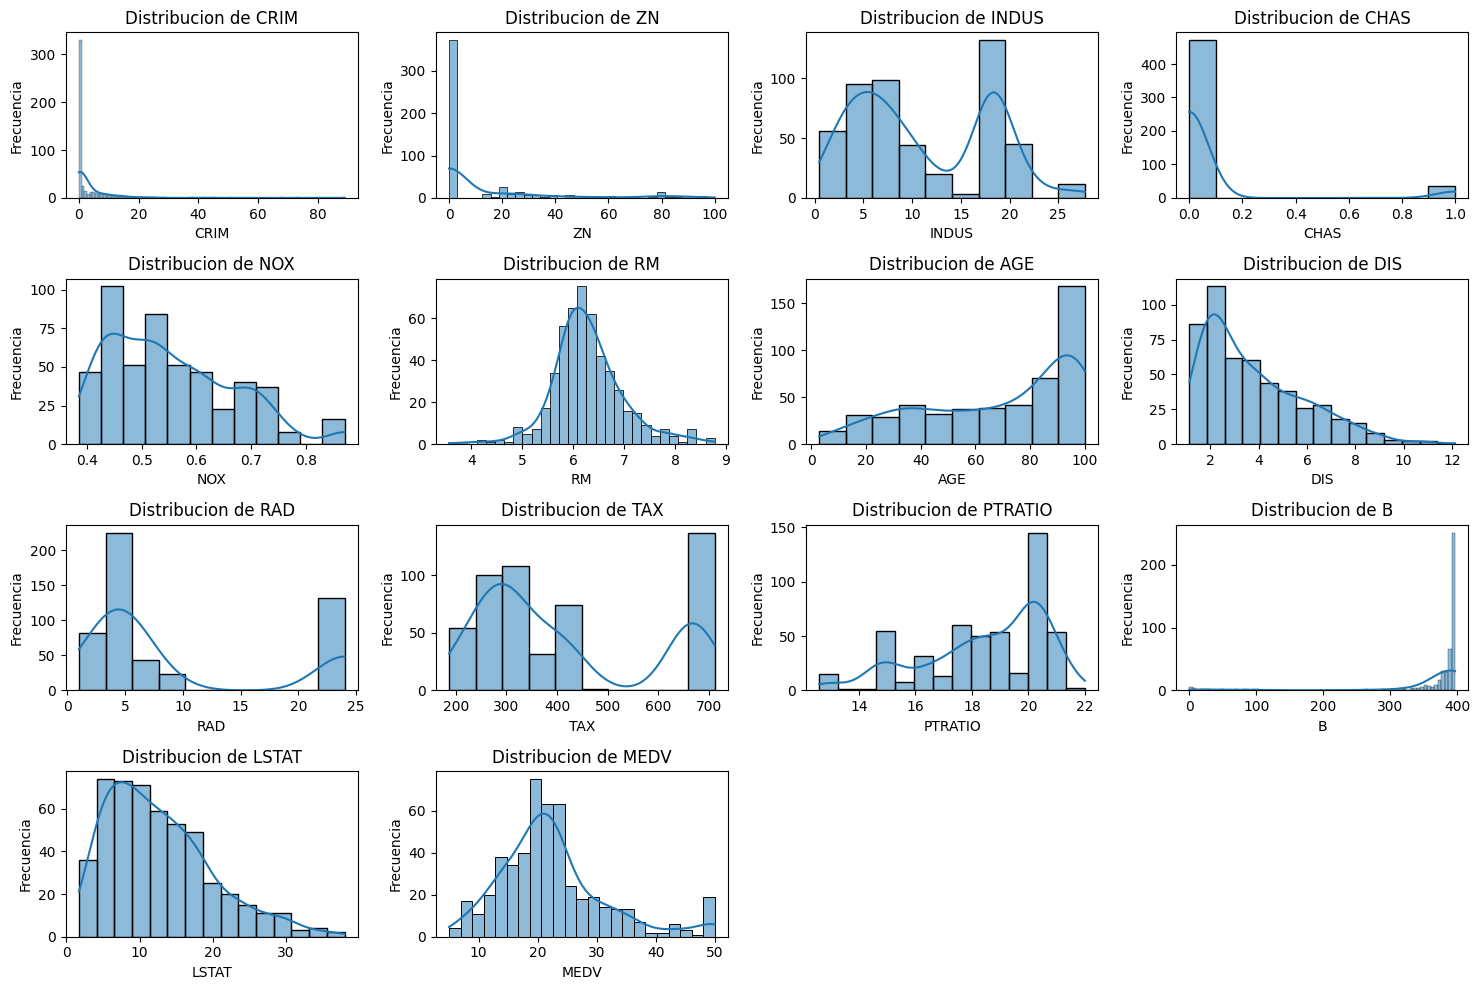

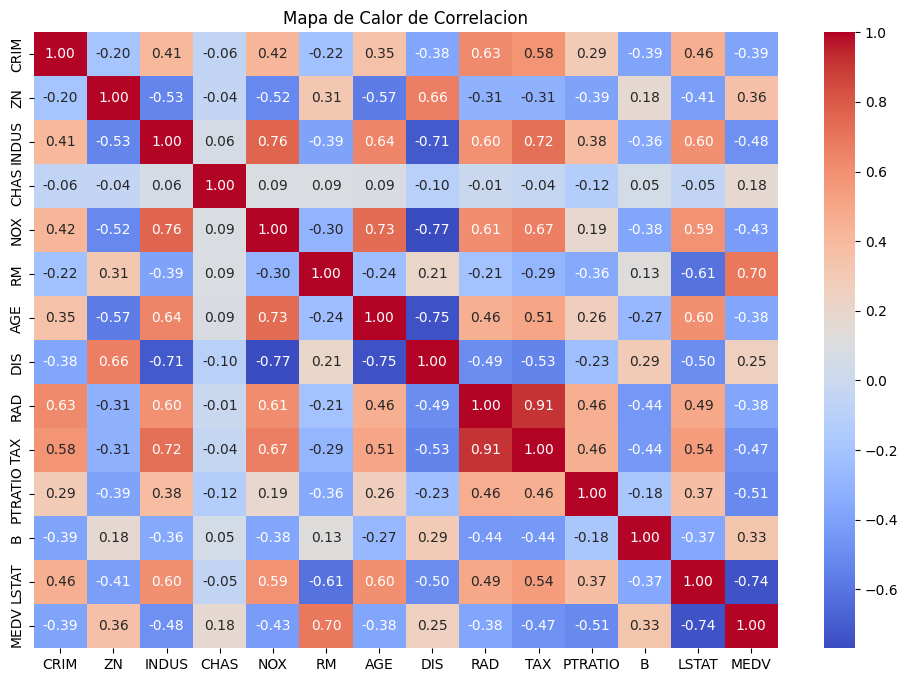

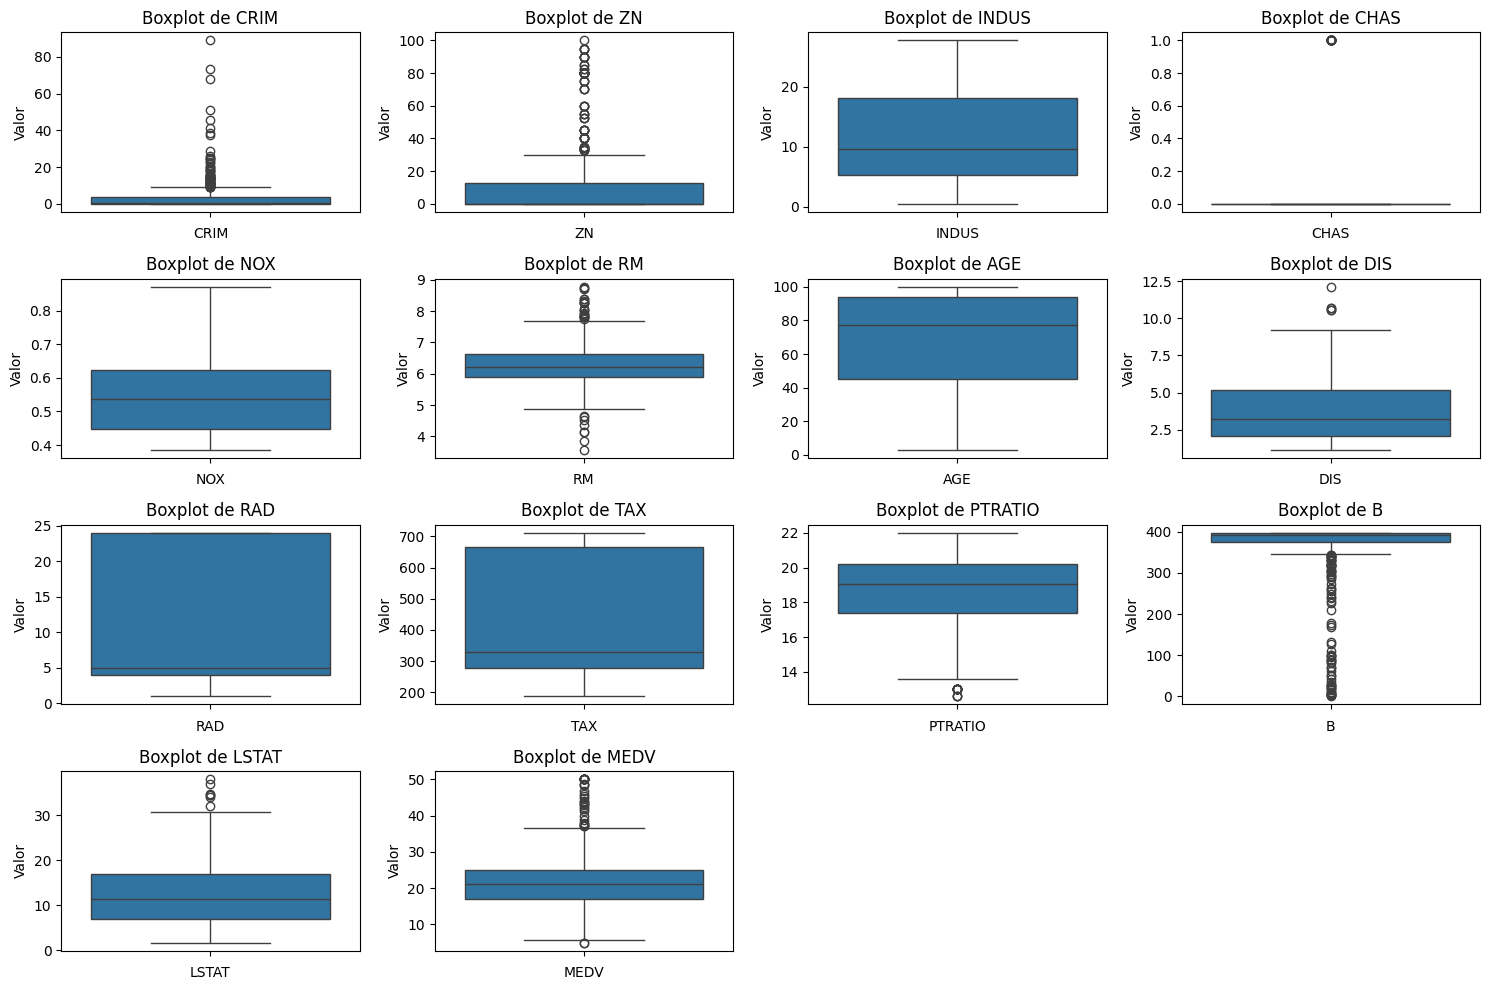

In [3]:
#Analisis descriptivo
print("Estadisticas descriptivas:")
print(df.describe())

#Tipo de datos
print("\nTipo de datos:")
print(df.dtypes)

#Revvision de valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

#Deteccion de outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Límites para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Contar cuantos outliers hay por columna
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers")

#Correlacion con la variable objetivo (MEDV)
print("\nCorrelacion con MEDV: ")
print(df.corr()['MEDV'].sort_values(ascending=False))

#Visualizaicon de distribuciones de las caracteristicas, correlaciones y outliers
plt.figure(figsize=(15,10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribucion de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.title('Mapa de Calor de Correlacion')
plt.show()

#Outliers boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

**Interpretacion**

* Todas la variables del dataset son numericas (flot64) lo que indica que no se require codificacion ni tratamiento en las categorias de los datos. No existen valores nulos con el conjuntos de datos, por lo que no se requiere imputacion.Los rangos de los valores son muy distintos entre variables, por ejemplo CRIM y TAX, lo que sugiere que sera necesario escalar o normalizar los datos antes del modelado.

* Las distribuciones en la mayoria de las variables presentan distribuciones sesgadas hacia a la derecha. Algunas variables como RM se distribuyen mas simetricamente, lo cual indica mayor estabilidad.Tambien se identificaron outliers principalmente en variables como CRIM, ZN, y B. Estos outliers se consideran naturales porque representan zonas reales con condiciones fuera del promedio, como areas con alta criminalidad o baja densidad residencial, por lo que en esta practica no se modificaran.

* En el mapa de calor, RM tiene la correlacion positiva mas alta con MEDV y LSTAT la mas negativa, indicando que el numero de habitaciones y el nivel socioeconomico influyen directamente en el valor medio de las viviendas.



## 3. Preprocesamiento: Maneje cualquier valor nulo y codifica las caracteristicas si es necesario.

Valores nulos antes de la imputacion:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Conteo de clases: 
MEDV_clase
Medio    243
Bajo     215
Alto      48
Name: count, dtype: int64


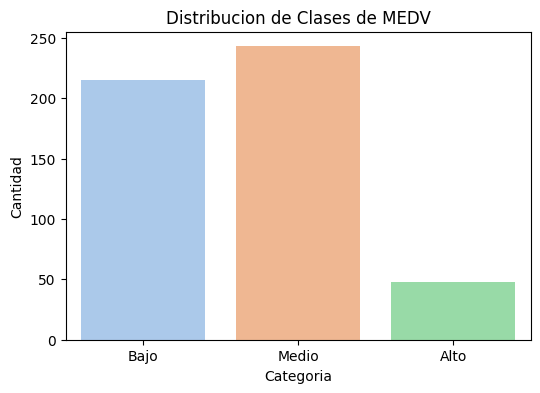

In [4]:
print("Valores nulos antes de la imputacion:")
print(df.isnull().sum())

#Crear variable categorica a partir de MDEV
df['MEDV_clase'] = pd.cut(df['MEDV'], bins=[0, 20, 35, 55], labels=['Bajo', 'Medio', 'Alto'])

print("\nConteo de clases: ")
print(df['MEDV_clase'].value_counts())

#Visualizacion del balance de clases
plt.figure(figsize=(6,4))
sns.countplot(x='MEDV_clase', data=df, palette='pastel',hue='MEDV_clase')
plt.title('Distribucion de Clases de MEDV')
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.show()



**Interpretacion**

* No existen valores nulos ni variables que necesiten codificacion.
Se creo una nueva columna llamada MEDV_clase que clasifica el valor medio de las viviendas en tres rangos:
  * Bajo (menor a 20)
  * Medio (entre 20 y 35)
  * Alto (mayor a 35)

* La distribucion de clases muestra una mayor concentracion en la categoria media, lo que indica que la mayoria de las viviendas estan en un rango de precio intermedio.

## 4. División de Conjuntos: Divida los datos en conjuntos de entrenamiento y prueba.

In [5]:
from sklearn.model_selection import train_test_split

#Definir variables predictoras (X) y variables objetivo (y)
X = df.drop(['MEDV', 'MEDV_clase'], axis=1)
y = df['MEDV_clase']

#Dividir el conjunt de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

print("Tamanos de los conjuntos:")
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Tamanos de los conjuntos:
Entrenamiento: (354, 13)
Prueba: (152, 13)


**Interpretacion**

* Se dividio el dataset en dos partes:
    * 70% para entrenamiento (X_train, y_train)
    * 30% para prueba (X_test, y_test)

* Se us stratify=y para mantener la misma proporción de clases (“Bajo”, “Medio”, “Alto”) en ambos conjuntos.

* Esto garantiza que el modelo vea una distribucion balanceada durante el entrenamiento y la evaluacion.

* La division permite entrenar el arbol con un grupo de datos y evaluar su rendimiento con datos que nunca ha visto.

## 5. Entrenamiento: Entrene un árbol de decisión.

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Crear el modelo
modelo = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

#Entrenar el model
modelo.fit(X_train, y_train)

print("Modelo entrenado")

Modelo entrenado


**Interpretacion**

* Se entreno un modelo de arbol de decision usando el criterio de impureza Gini y una profundidad maxima de 3 niveles.

* Durante el entrenamiento, el modelo aprendio reglas que permiten clasificar las viviendas (bajo, medio o alto) segun las variables del dataset, como el numero de habitaciones (RM) o el nivel socioeconomico (LSTAT).

* Este proceso ajusta el modelo para que pueda reconocer patrones y tomar decisiones en funcion de los datos de entrada.

## 6. Optimización: Experimente con la profundidad del árbol (max_depth) y observa cómo afecta la precisión.

**Interpretacion**

* Se probaron diferentes valores de profundidad del arbol (max_depth) para analizar como afecta la precision.

* Los resultados muestran que la precision mejora hasta una profundidad de 4 (aprox. 0.83) y luego se estabiliza o disminuye ligeramente, lo que indica que arboles muy profundos tienden a sobreajustarse.

* La profundidad optima encontrada fue 4, donde el modelo logra el mejor equilibrio entre simplicidad y rendimiento.

In [9]:
from sklearn.metrics import accuracy_score

#Lista de profundidades a probar
depths = [1,2,3,4,5,7,10, None]
print('Evaluacion del modelo con diferentes profundidades')
for depth in depths:
  modelo = DecisionTreeClassifier(criterion='gini',max_depth=depth,random_state=42)

  #Entrenar modelo
  modelo.fit(X_train, y_train)
  #Hacer predicciones
  y_pred = modelo.predict(X_test)
  # Calcular precision
  acc = accuracy_score(y_test, y_pred)
  print(f'Profundidad: {depth}, Precision: {acc}')


Evaluacion del modelo con diferentes profundidades
Profundidad: 1, Precision: 0.75
Profundidad: 2, Precision: 0.7828947368421053
Profundidad: 3, Precision: 0.8026315789473685
Profundidad: 4, Precision: 0.8289473684210527
Profundidad: 5, Precision: 0.8026315789473685
Profundidad: 7, Precision: 0.8223684210526315
Profundidad: 10, Precision: 0.8026315789473685
Profundidad: None, Precision: 0.8026315789473685


**Interpretacion**

* Al aumentar la produndidad, el arbol aprende mas detalles

    * Con valores bajos (1-3) aprende de manera general.
    * Con valores altos (7-10 o None), el modelo puede sobreajustarse

* Generalmente la precision sube al principio y luego se estabiliza o incluso baja si el arbol se vuelve demasiado especifico.

## 7. Evaluación: Evalúa el modelo utilizando precisión, recall y F1-score

Reporte de Clasificacion:

              precision    recall  f1-score   support

        Alto       1.00      0.57      0.73        14
        Bajo       0.92      0.75      0.83        65
       Medio       0.76      0.95      0.84        73

    accuracy                           0.83       152
   macro avg       0.89      0.76      0.80       152
weighted avg       0.85      0.83      0.83       152

Matriz de Confusion:

[[ 8  0  6]
 [ 0 49 16]
 [ 0  4 69]]


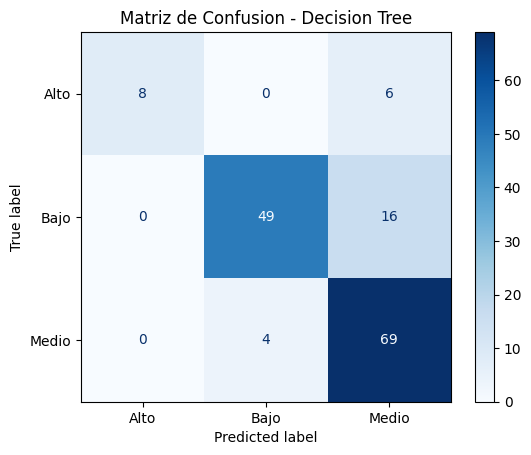

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predecir con el mejor modelo (por ejemplo, profundidad 4)
mejor_modelo = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
mejor_modelo.fit(X_train, y_train)
y_pred = mejor_modelo.predict(X_test)

# Reporte de clasificacion
print("Reporte de Clasificacion:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusion
print("Matriz de Confusion:\n")
cm = confusion_matrix(y_test, y_pred, labels=mejor_modelo.classes_)
print(cm)

# Visualizacion grafica de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mejor_modelo.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusion - Decision Tree")
plt.show()


**Interpretacion**

* El modelo muestra un buen desempeño general, con una precision promedio cercana al 80%.

* Las clases “Bajo” y “Medio” son las mejor reconocidas, mientras que “Alto” presenta más confusiones debido a su menor cantidad de ejemplos.

* La matriz de confusion confirma que la mayoria de las predicciones coinciden con las clases reales, por lo que el modelo logra una clasificacion adecuada sin sobreajuste.